In [4]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [5]:
# 读取mnist数据集
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [6]:
# 将features用reshape方式转换
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [7]:
# 把数据标准化, 标准化可以提高训练的精度
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [17]:
# 使用np_utils.to_categorial()将训练数据的label和测试数据的label进行 One-Hot Encoding 转换
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

### 建立模型
- 建立多层感知器模型，输入层（x）共有784的神经元，隐藏从（h）共有256个神经元，输出层（y）共有10个神经元

In [11]:
# 导入所需模块
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# 建立Sequential模型
# 建立一个线性堆叠模型，后续只需要使用 model.add() 方法将各个神经网络层加入模型即可
model = Sequential()

In [13]:
# 建立输入层与隐藏层
# 以下代码将“输入层”与“隐藏层”加入模型，使用model.add()方法加入Dense神经网络层。
# Dense神经网络层的特色是：所有的上一层与下一层神经元都完全连接
model.add(Dense(units=256, 
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

- units=256 定义“隐藏层”神经元个数为256
- input_dim=784 定义“输入层”神经元个数为784（因为原先28*28的二维图形数据被转换为784的一位向量）
- kernel_initializer='normal' 使用normal distribution正态分布的随机数来初始化 weight（权重）和bias（偏差）
- activation 定义激活函数为 relu

In [14]:
# 建立输出层
# 使用model.add 方法加入神经网络层，共有10个神经元，对应0-9十个数字，
# 并且使用softmax激活函数进行转换，softmax可以将神经元的输出转换为预测每一个数字的概率
model.add(Dense(units=10,
                             kernel_initializer='normal',
                             activation='softmax'))

- units=10 定义“输出层”神经元个数为10
- kernel_initializer='normal' 使用normal distribution正态分布的随机数来初始化 weight（权重）和bias（偏差）
- activation 定义激活函数为 softmax

### 以上建立Dense神经网络层不需要设置 input_dim, 因为 keras会自动按照上一层的units是256个神经元设置这一层的input_dim为256个神经元

In [15]:
# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


### 一共有以下两层
- 隐藏层： 共256个神经元，因为输入层与隐藏层是一起建立的，所以没有显示输入层。
- 输出层： 共10个神经元。

### 模型摘要还有param字段
Param计算方式： 784 × 256 + 256 = 200960；256 × 10 + 10 = 2570
- 以上每一层的param都是超参数（Hyper-Parameters）。我们需要通过反向传播法更新神经元连接的权重与偏差

--------------

##  进行训练

In [16]:
# 定义训练方式
# 在训练之前，我们必须用compile 方法对训练模型进行设置
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### compile 方法需输入以下参数
- loss: 设置损失函数，在深度学习中使用 cross_entropy(交叉熵)训练的效果比较好
- optimizer: 设置训练时，在深度学习中使用adam优化器可以让训练收敛更快，并提高准确率
- metrics: 设置评估模型的方式是准确率

In [18]:
# 开始训练
train_history = model.fit(x = x_Train_normalize,
                                     y = y_Train_OneHot, validation_split=0.2,
                                     epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4398 - acc: 0.8825 - val_loss: 0.2184 - val_acc: 0.9408
Epoch 2/10
 - 2s - loss: 0.1912 - acc: 0.9452 - val_loss: 0.1560 - val_acc: 0.9551
Epoch 3/10
 - 3s - loss: 0.1359 - acc: 0.9615 - val_loss: 0.1260 - val_acc: 0.9646
Epoch 4/10
 - 2s - loss: 0.1031 - acc: 0.9704 - val_loss: 0.1124 - val_acc: 0.9682
Epoch 5/10
 - 2s - loss: 0.0814 - acc: 0.9771 - val_loss: 0.0980 - val_acc: 0.9716
Epoch 6/10
 - 3s - loss: 0.0662 - acc: 0.9818 - val_loss: 0.0936 - val_acc: 0.9713
Epoch 7/10
 - 2s - loss: 0.0546 - acc: 0.9852 - val_loss: 0.0909 - val_acc: 0.9743
Epoch 8/10
 - 3s - loss: 0.0459 - acc: 0.9877 - val_loss: 0.0825 - val_acc: 0.9766
Epoch 9/10
 - 3s - loss: 0.0380 - acc: 0.9906 - val_loss: 0.0816 - val_acc: 0.9768
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9918 - val_loss: 0.0805 - val_acc: 0.9765


### 以上程序说明如下
#### 使用model.fit 进行训练，训练过程会存储在train_history变量中，需输入下列参数。
#### (1) 输入训练数据参数
- x = x_Train_normalize （features 数字图像的特征值）
- y = y_Train_Onehot （label 数字图像的真实值） 

#### (2) 设置训练与验证数据的比例
- 设置参数validation_split=0.2

    训练之前keras会自动将数据分成：80%作为训练集，20%作为验证集。（全部数据时60000， 所有训练集：60000×0.8=48000， 验证集12000）
    
#### (3) 设置epoch（训练周期）次数与每一批次项数
- epochs=10: 执行10个训练周期
- batch_size=200: 每一批次200项数据

#### (4) 设置显示训练过程
- verbose=2: 显示训练过程

### 以上代码共执行了10次训练周期，每一次训练执行下列功能
- 使用48000项数据进行训练，分每一批次200项，所有大约分为240个批次（48000/200=240）进行训练
- 训练完成后，会计算这个训练周期的准确率与误差，并且在train_history中新增一项数据记录

In [19]:
# 建立show_train_history显示训练过程
# 可以使用如下方法，读取train_history，以图表显示训练过程。
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Train')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

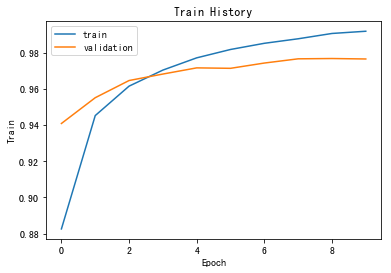

In [20]:
show_train_history(train_history, 'acc', 'val_acc')

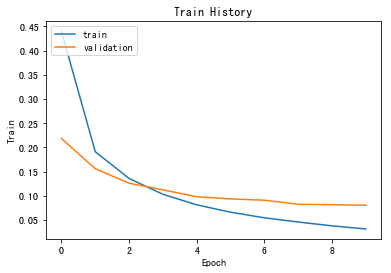

In [21]:
# 画出误差执行结果
show_train_history(train_history, 'loss', 'val_loss')

---

## 以测试数据评估模型准确率

In [22]:
# 评估模型准确率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy = ', scores[1])

10000/10000 [==============================] - 0s 48us/step

accuracy =  0.9764


### 以上程序代码的执行结果准确率为 0.97
- scores = model.evaluate() 使用model.evaluate评估模型的准确率，评估后的准确率会存储在scores中
- x = x_Test_normalize 测试数据的features（数字图像的特征值）
- y = y_Test_Onehot 测试数据的label（数字图像的真实值）

### 进行预测

In [31]:
# 使用未标准化的数据进行预测
prediction = model.predict_classes(x_Test)

In [32]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
        pass
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1) #建立 subgraph子图形 为 5行 5列
        ax.imshow(images[idx], cmap='binary') # 画出 subgraph 子图形
        title= 'label=' + str(labels[idx]) # 设置子图形的title， 显示标签字段
        if len(prediction)>0: # 如果传入的预测结果
            title += ', predict='+str(prediction[idx]) # 标题
        ax.set_title(title, fontsize=10) # 设置子图形的标题
        ax.set_xticks([]) # 设置不显示刻度
        ax.set_yticks([])
        idx+=1
    plt.show()

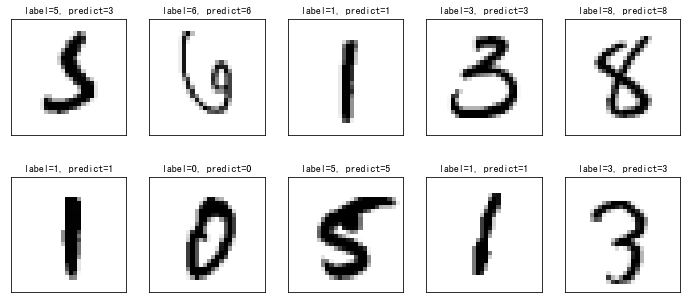

In [34]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

In [37]:
# 使用标准化后的数据进行预测
prediction2 = model.predict_classes(x_Test_normalize)

In [38]:
prediction2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

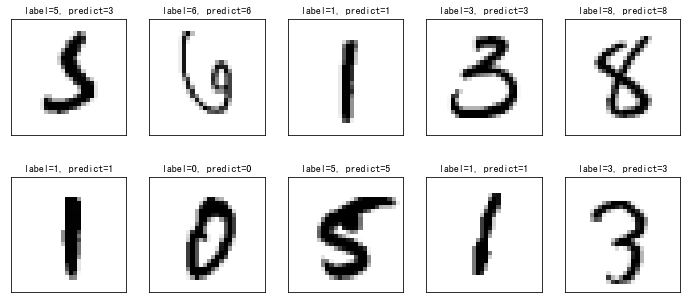

In [39]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction2, idx=340)

---

## 显示混淆矩阵
    在上张图中有一个预测错误，真实值是5，但是预测值是3。如果我们想要进一步知道所建立的模型中哪些数字的预测准确率最高，哪些数字容易混淆（例如真实值是5，预测值是3），就可以使用混淆矩阵（CONFUSION MATRIX） 也成为误差矩阵（ERROR MATRIX）

In [40]:
import pandas as pd

In [41]:
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1011,1,1,0,2,3,8,0
3,0,0,4,994,0,0,0,3,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,852,7,1,9,3
6,6,3,3,1,3,3,937,0,2,0
7,0,5,14,6,1,0,0,990,4,8
8,5,0,3,5,1,1,1,2,955,1


### 上面混淆矩阵，观察结果如下
- 对角线是预测正确的数字，我们发现：真实值是“1”，被预测为“1”的项数有1124项，被预测准确率最高，最不容易混淆。真实值是5，被预测为5的项数是852项最低，也就是说最容易混淆
- 其他非对角线的数字代表将某一个标签预测错误，成为另一个标签，我们发现：真实值是5，但是预测值是3

In [42]:
# 建立真实值与预测值DataFrame
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})

In [44]:
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [51]:
# 查询真实值是5， 但是预测值是3的数据
df[(df.label==5) & (df.predict==3)].head()

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3


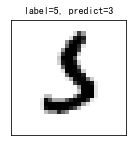

In [54]:
# 查看第340项数据
plot_images_labels_prediction(x_test_image, y_test_label, prediction, 340, 1)

### 从执行结果来看，这个数字看起来像5又像3，所以预测错误

---

## 隐藏层增加为1000个神经元
- 为了增加多层感知模型的准确率，将原本256个神经元改为1000

In [55]:
model = Sequential()

In [56]:
# 将“输入层”与“隐藏层”加入模型
model.add(Dense(units=1000, 
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [57]:
# 将“输出层”加入模型
model.add(Dense(units=10,
                             kernel_initializer='normal',
                             activation='softmax'))

In [59]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
train_history = model.fit(x = x_Train_normalize,
                                     y = y_Train_OneHot, validation_split=0.2,
                                     epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.2922 - acc: 0.9161 - val_loss: 0.1539 - val_acc: 0.9559
Epoch 2/10
 - 9s - loss: 0.1150 - acc: 0.9670 - val_loss: 0.1204 - val_acc: 0.9643
Epoch 3/10
 - 9s - loss: 0.0736 - acc: 0.9791 - val_loss: 0.0921 - val_acc: 0.9732
Epoch 4/10
 - 9s - loss: 0.0519 - acc: 0.9855 - val_loss: 0.0820 - val_acc: 0.9747
Epoch 5/10
 - 9s - loss: 0.0362 - acc: 0.9905 - val_loss: 0.0839 - val_acc: 0.9748
Epoch 6/10
 - 10s - loss: 0.0249 - acc: 0.9938 - val_loss: 0.0732 - val_acc: 0.9784
Epoch 7/10
 - 10s - loss: 0.0186 - acc: 0.9955 - val_loss: 0.0728 - val_acc: 0.9781
Epoch 8/10
 - 9s - loss: 0.0136 - acc: 0.9971 - val_loss: 0.0742 - val_acc: 0.9794
Epoch 9/10
 - 9s - loss: 0.0099 - acc: 0.9981 - val_loss: 0.0707 - val_acc: 0.9798
Epoch 10/10
 - 9s - loss: 0.0069 - acc: 0.9991 - val_loss: 0.0785 - val_acc: 0.9776


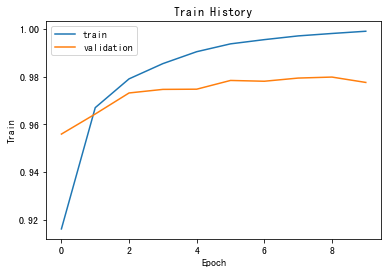

In [62]:
show_train_history(train_history, 'acc', 'val_acc')

####  通过上图，可以看出训练集的正确性很高， 而验证集的准确性不太高，存在过拟合问题

In [64]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy = ', scores[1])

10000/10000 [==============================] - 2s 150us/step

accuracy =  0.9798


---

## 多层感知器加入DropOut功能，以避免过度拟合

In [65]:
from keras.layers import Dropout

In [77]:
model = Sequential()

In [78]:
# 将输入层与隐藏层加入模型
model.add(Dense(units=1000,
                               input_dim=784,
                               kernel_initializer='normal',
                               activation='relu'))

In [79]:
# 加入DropOut功能
model.add(Dropout(0.5))

In [80]:
# 将输出层加入模型
model.add(Dense(units=10,
                            kernel_initializer='normal',
                           activation='softmax'))

In [81]:
# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
# 执行模型的训练或验证之前需要compile模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
train_history = model.fit(x = x_Train_normalize,
                                     y = y_Train_OneHot, validation_split=0.2,
                                     epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.3570 - acc: 0.8936 - val_loss: 0.1604 - val_acc: 0.9543
Epoch 2/10
 - 11s - loss: 0.1577 - acc: 0.9541 - val_loss: 0.1199 - val_acc: 0.9660
Epoch 3/10
 - 12s - loss: 0.1141 - acc: 0.9664 - val_loss: 0.0943 - val_acc: 0.9728
Epoch 4/10
 - 11s - loss: 0.0891 - acc: 0.9735 - val_loss: 0.0870 - val_acc: 0.9738
Epoch 5/10
 - 10s - loss: 0.0733 - acc: 0.9781 - val_loss: 0.0782 - val_acc: 0.9773
Epoch 6/10
 - 10s - loss: 0.0630 - acc: 0.9809 - val_loss: 0.0771 - val_acc: 0.9763
Epoch 7/10
 - 10s - loss: 0.0537 - acc: 0.9835 - val_loss: 0.0718 - val_acc: 0.9785
Epoch 8/10
 - 10s - loss: 0.0456 - acc: 0.9858 - val_loss: 0.0726 - val_acc: 0.9786
Epoch 9/10
 - 10s - loss: 0.0415 - acc: 0.9875 - val_loss: 0.0695 - val_acc: 0.9798
Epoch 10/10
 - 11s - loss: 0.0375 - acc: 0.9882 - val_loss: 0.0718 - val_acc: 0.9803


#### acc 和 val_acc 的值差距很小，代表已经改善了过度拟合的问题

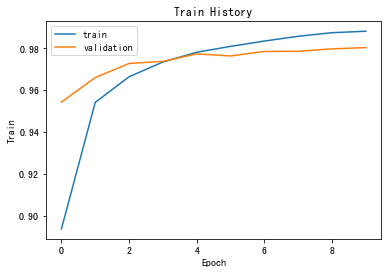

In [85]:
# 训练过程图示
show_train_history(train_history, 'acc', 'val_acc')

#### 训练的准确度和验证的准确度差距变小，过度拟合的程度已经减轻

In [86]:
# 查看准确率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print(' accuracy = ', scores[1])

10000/10000 [==============================] - 2s 154us/step

 accuracy =  0.9816


#### 从以上结果可得准确率为0.98，比未加入DropOut时还高，代表加入DropOut不但可以解决过拟合问题，还可以提高准确率

---

## 建立多层感知器模型，包含两个隐藏层
- 为了进一步增加多层感知器模型的准确率，本次将建立两个隐藏层

In [98]:
model = Sequential()

#### 加入输入层和隐藏层1

In [99]:
model.add(Dense(units=1000,
                               input_dim=784,
                               kernel_initializer='normal',
                               activation='relu'))

In [100]:
model.add(Dropout(0.5))

#### 加入隐藏层2

In [101]:
model.add(Dense(units=1000,
                               kernel_initializer='normal',
                               activation='relu'))

In [102]:
model.add(Dropout(0.5))

#### 加入输出层

In [103]:
model.add(Dense(units=10,
                               kernel_initializer='normal',
                               activation='softmax'))

In [104]:
# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
# 先编译模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
# 在训练模型
train_history = model.fit(x=x_Train_normalize, y=y_Train_OneHot,
                 validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 28s - loss: 0.3681 - acc: 0.8857 - val_loss: 0.1324 - val_acc: 0.9606
Epoch 2/10
 - 31s - loss: 0.1607 - acc: 0.9502 - val_loss: 0.1057 - val_acc: 0.9670
Epoch 3/10
 - 29s - loss: 0.1211 - acc: 0.9624 - val_loss: 0.0868 - val_acc: 0.9736
Epoch 4/10
 - 28s - loss: 0.1008 - acc: 0.9685 - val_loss: 0.0849 - val_acc: 0.9747
Epoch 5/10
 - 30s - loss: 0.0828 - acc: 0.9740 - val_loss: 0.0740 - val_acc: 0.9780
Epoch 6/10
 - 30s - loss: 0.0731 - acc: 0.9756 - val_loss: 0.0746 - val_acc: 0.9779
Epoch 7/10
 - 24s - loss: 0.0690 - acc: 0.9779 - val_loss: 0.0701 - val_acc: 0.9788
Epoch 8/10
 - 25s - loss: 0.0625 - acc: 0.9800 - val_loss: 0.0728 - val_acc: 0.9793
Epoch 9/10
 - 24s - loss: 0.0563 - acc: 0.9817 - val_loss: 0.0753 - val_acc: 0.9791
Epoch 10/10
 - 24s - loss: 0.0506 - acc: 0.9837 - val_loss: 0.0723 - val_acc: 0.9807


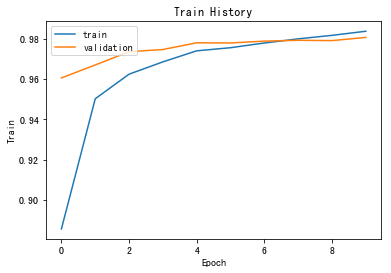

In [107]:
show_train_history(train_history, 'acc',  'val_acc')

### Epoch训练后期，虽然“acc训练的准确率”比“val_acc训练的准确率”高，但是“训练的准确率”和“验证的准确率”差距变小，这代表已经大致解决的过度拟合的问题

In [109]:
# 查看准确率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy = ', scores[1])

10000/10000 [==============================] - 3s 290us/step

accuracy =  0.9824


### 从以上结果可以看出准确率是0.98, 没有明显提升

## 结论
- ### 从以上例子中，我们使用多层感知器模型来识别MNIST数据集中的手写数字，并尝试将模型加宽，加深，以提高准确率，并且加入DropOut层，以避免过度拟合，准确率接近0.98。不过，多层感知器有其极限，如果还需要进一步提高准确率，就必须使用卷积神经网络。

###  >> 卷积神经网络 <<